In [16]:
from selenium import webdriver
import os
import time
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
import urllib
import matplotlib.pyplot as plt
import numpy as np

#### 페이지 오픈하는 방법.

In [390]:

# chromedriver의 위치를 지정해준다.
# driver = webdriver.Chrome('/Users/rira/crawling/chromedriver')
# # implicitly_wait(3)는 반드시 해줘야 함.
# driver.implicitly_wait(3)

# # 클라스에 저장해 둔 회사의 코드 넘버를 불러와서 웹페이지에 들어간당!
# code = companyclassname.codenum
# #print(code)

# # 코드 번호를 이용해서 웹 페이지 들어감.
# driver.get('https://finance.daum.net/quotes/A{}#current/quote'.format(code))
# driver.implicitly_wait(3)
# WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//div[@id='boxDayHistory']//a[@class='btnMove' and text()='2']"))).click()
# driver.find_element_by_css_selector("#boxDayHistory .btnNext").click()


# html 소스 beautiful soup으로 가지고 올 수 있다.
#     html = driver.page_source
#     soup = BeautifulSoup(html, 'html.parser')
    
    


# functions 

In [2]:
# 회사를 저장하는 class
class Company():
    def __init__(self, companyname, codenum):
        self.companyname = companyname
        self.codenum = codenum

In [3]:
# 크롤링할 데이터 저장할 클래스 생성.
class StockPrice():
    def __init__(self, date, openprice, highprice, lowprice, closeprice,compare,fluctuation,volumns):
        self.date = date
        self.openprice = openprice
        self.highprice = highprice
        self.lowprice = lowprice
        self.closeprice = closeprice
        self.compare = compare
        self.fluctuation = fluctuation
        self.volumns = volumns

In [4]:
# 데이터 크롤링 하는 function.
def Getdata(soup):
    stock_list = []

    row = soup.findAll("tr", {"class" : "first" })
    span = row[4].findAll("span",{"class" : "time"})
    date =span[0].text.replace(".","-")
    openprice = int(row[4].findAll("span", {"num"})[0].text.replace(",",""))
    highprice = int(row[4].findAll("span", {"num"})[1].text.replace(",",""))
    lowprice = int(row[4].findAll("span", {"num"})[2].text.replace(",",""))
    closeprice = int(row[4].findAll("span", {"num"})[3].text.replace(",",""))
    compare = row[4].findAll("span", {"num"})[4].text
    fluctuation = row[4].findAll("span", {"num"})[5].text
    volumns = int(row[4].findAll("span", {"num"})[6].text.replace(",",""))
    sp = StockPrice(date, openprice, highprice, lowprice, closeprice,compare,fluctuation,volumns)
    stock_list.append(sp)

    for i in range(23, 26):
        row = soup.findAll("tr", {"class" : "" })
        span = row[i].findAll("span",{"class" : "time"})
        date = span[0].text.replace(".","-")
        openprice = int(row[i].findAll("span", {"num"})[0].text.replace(",",""))
        highprice = int(row[i].findAll("span", {"num"})[1].text.replace(",",""))
        lowprice = int(row[i].findAll("span", {"num"})[2].text.replace(",",""))
        closeprice = int(row[i].findAll("span", {"num"})[3].text.replace(",",""))
        compare = row[i].findAll("span", {"num"})[4].text
        fluctuation = row[i].findAll("span", {"num"})[5].text
        volumns = int(row[i].findAll("span", {"num"})[6].text.replace(",",""))
        sp = StockPrice(date, openprice, highprice, lowprice, closeprice,compare,fluctuation,volumns)
        stock_list.append(sp)

    row = soup.findAll("tr", {"class" : "last" })
    span = row[7].findAll("span",{"class" : "time"})
    date =span[0].text.replace(".","-")
    openprice = int(row[7].findAll("span", {"num"})[0].text.replace(",",""))
    highprice = int(row[7].findAll("span", {"num"})[1].text.replace(",",""))
    lowprice = int(row[7].findAll("span", {"num"})[2].text.replace(",",""))
    closeprice = int(row[7].findAll("span", {"num"})[3].text.replace(",",""))
    compare = row[7].findAll("span", {"num"})[4].text
    fluctuation = row[7].findAll("span", {"num"})[5].text
    volumns = int(row[7].findAll("span", {"num"})[6].text.replace(",",""))
    sp = StockPrice(date, openprice, highprice, lowprice, closeprice,compare,fluctuation,volumns)
    stock_list.append(sp)


    row = soup.findAll("tr", {"class" : "line" })
    span = row[3].findAll("span",{"class" : "time"})
    date =span[0].text.replace(".","-")
    openprice = int(row[3].findAll("span", {"num"})[0].text.replace(",",""))
    highprice = int(row[3].findAll("span", {"num"})[1].text.replace(",",""))
    lowprice = int(row[3].findAll("span", {"num"})[2].text.replace(",",""))
    closeprice = int(row[3].findAll("span", {"num"})[3].text.replace(",",""))
    compare = row[3].findAll("span", {"num"})[4].text
    fluctuation = row[3].findAll("span", {"num"})[5].text
    volumns = int(row[3].findAll("span", {"num"})[6].text.replace(",",""))
    sp = StockPrice(date, openprice, highprice, lowprice, closeprice,compare,fluctuation,volumns)
    stock_list.append(sp)


    for i in range(26, 29):
        row = soup.findAll("tr", {"class" : "" })
        span = row[i].findAll("span",{"class" : "time"})
        date = span[0].text.replace(".","-")
        openprice = int(row[i].findAll("span", {"num"})[0].text.replace(",",""))
        highprice = int(row[i].findAll("span", {"num"})[1].text.replace(",",""))
        lowprice = int(row[i].findAll("span", {"num"})[2].text.replace(",",""))
        closeprice = int(row[i].findAll("span", {"num"})[3].text.replace(",",""))
        compare = row[i].findAll("span", {"num"})[4].text
        fluctuation = row[i].findAll("span", {"num"})[5].text
        volumns = int(row[i].findAll("span", {"num"})[6].text.replace(",",""))
        sp = StockPrice(date, openprice, highprice, lowprice, closeprice,compare,fluctuation,volumns)
        stock_list.append(sp)

    row = soup.findAll("tr", {"class" : "last last" })
    span = row[3].findAll("span",{"class" : "time"})
    date =span[0].text.replace(".","-")
    openprice = int(row[3].findAll("span", {"num"})[0].text.replace(",",""))
    highprice = int(row[3].findAll("span", {"num"})[1].text.replace(",",""))
    lowprice = int(row[3].findAll("span", {"num"})[2].text.replace(",",""))
    closeprice = int(row[3].findAll("span", {"num"})[3].text.replace(",",""))
    compare = row[3].findAll("span", {"num"})[4].text
    fluctuation = row[3].findAll("span", {"num"})[5].text
    volumns = int(row[3].findAll("span", {"num"})[6].text.replace(",",""))
    sp = StockPrice(date, openprice, highprice, lowprice, closeprice,compare,fluctuation,volumns)
    stock_list.append(sp)
    
    return stock_list



In [17]:
def PageCrawling(companyclassname, pagenum):
    driver = webdriver.Chrome('/Users/rira/crawling/chromedriver')
    # implicitly_wait(3)는 반드시 해줘야 함.
    driver.implicitly_wait(3)

    # 클라스에 저장해 둔 회사의 코드 넘버를 불러와서 웹페이지에 들어간당!
    code = companyclassname.codenum
    #print(code)

    # 코드 번호를 이용해서 웹 페이지 들어감.
    driver.get('https://finance.daum.net/quotes/A{}#current/quote'.format(code))
    driver.implicitly_wait(3)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    data_list = []
    for i in range(1,pagenum):
        if i == 1:
            data_list = Getdata(soup)       
        elif i % 10 != 1:
            WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//div[@id='boxDayHistory']//a[@class='btnMove' and text()='{}']".format(i)))).click()
            html = driver.page_source
            soupinfo = BeautifulSoup(html, 'html.parser')
            add_list = Getdata(soupinfo)
            data_list = data_list  + add_list
        else:
            driver.find_element_by_css_selector("#boxDayHistory .btnNext").click()
            html = driver.page_source
            soupinfo = BeautifulSoup(html, 'html.parser')
            add_list = Getdata(soupinfo)
            data_list = data_list  + add_list
    return data_list

In [11]:
# 불러온 리스트를 데이터 프레임으로 만들는 함수.

def PandasDate(splist):
    dateList = []
    openpriceList = []
    highpriceList = []
    lowpriceList = []
    closepriceList = []
    compareList = []
    fluctuationList = []
    volumnsList = []
    
    for sp in splist:
        dateList.append(sp.date)
        openpriceList.append(sp.openprice)
        highpriceList.append(sp.highprice)
        lowpriceList.append(sp.lowprice)
        closepriceList.append(sp.closeprice)
        compareList.append(sp.compare)
        fluctuationList.append(sp.fluctuation)
        volumnsList.append(sp.volumns)
        
    raw_data = {"date":dateList,
                "openprice":openpriceList,
               "highprice":highpriceList,
               "lowprice":lowpriceList,
               "closeprice":closepriceList,
               "compare":compareList,
               "fluctuation":fluctuationList,
               "volumns":volumnsList}
    
    df = pd.DataFrame(raw_data)
    
    return df

In [7]:
# 저장하는 함수.
def save_csv(df, compname):
    company_name = compname.companyname
    df.to_csv("{}.csv".format(company_name), sep=',', encoding='utf-8-sig')
    #print(company_name)

# 실행.

### 삼성전자 005930

In [12]:
# 먼저 회사 데이터 저장. # 둘 다 스트링으로 저장.
samsung = Company('samsung','005930' )

In [19]:
# 데이터 크롤링하기. 40페이지까지(400개의 데이터)
samsung_data = PageCrawling(samsung, 41)

In [20]:
# 크롤링한 데이터 데이터프레임 형식으로 변환하기.
samsung_dataframe = PandasDate(samsung_data)

In [21]:
samsung_dataframe

,date,openprice,highprice,lowprice,closeprice,compare,fluctuation,volumns
0,19-02-28,46400,46500,45100,45100,"▼1,650",-3.53%,23534189
1,19-02-27,47000,47250,46750,46750,-0,0.00%,8045211
2,19-02-26,47350,47450,46500,46750,▼600,-1.27%,7985547
3,19-02-25,47400,47550,47050,47350,▲200,+0.42%,7484716
4,19-02-22,46500,47150,46450,47150,▲200,+0.43%,6895772
5,19-02-21,46500,47200,46200,46950,▲50,+0.11%,8694009
6,19-02-20,46750,47100,46500,46900,▲950,+2.07%,11506720
7,19-02-19,45850,46150,45450,45950,▼250,-0.54%,6741395
8,19-02-18,46500,46850,45850,46200,▲150,+0.33%,8183728
9,19-02-15,46750,46850,45650,46050,"▼1,450",-3.05%,10554643


In [404]:
# 데이터 프레임 csv파일로 저장.
save_csv(samsung_dataframe, samsung)

In [405]:
# 데이터 확인
samsung_dataframe

,date,openprice,highprice,lowprice,closeprice,compare,fluctuation,volumns
0,19-02-28,46400,46500,45100,45100,"▼1,650",-3.53%,23534189
1,19-02-27,47000,47250,46750,46750,-0,0.00%,8045211
2,19-02-26,47350,47450,46500,46750,▼600,-1.27%,7985547
3,19-02-25,47400,47550,47050,47350,▲200,+0.42%,7484716
4,19-02-22,46500,47150,46450,47150,▲200,+0.43%,6895772
5,19-02-21,46500,47200,46200,46950,▲50,+0.11%,8694009
6,19-02-20,46750,47100,46500,46900,▲950,+2.07%,11506720
7,19-02-19,45850,46150,45450,45950,▼250,-0.54%,6741395
8,19-02-18,46500,46850,45850,46200,▲150,+0.33%,8183728
9,19-02-15,46750,46850,45650,46050,"▼1,450",-3.05%,10554643


### selltrion  068270

In [14]:
selltrion = Company('selltrion', '068270')

In [22]:
selltrion_data = PageCrawling(selltrion, 41)

In [409]:
selltrion_dataframe = PandasDate(selltrion_data)

In [412]:
save_csv(selltrion_dataframe, selltrion)

In [413]:
selltrion_dataframe

,date,openprice,highprice,lowprice,closeprice,compare,fluctuation,volumns
0,19-02-28,203000,208000,203000,204500,"▲2,000",+0.99%,687853
1,19-02-27,204000,204500,202000,202500,"▼2,000",-0.98%,378242
2,19-02-26,205500,208000,203000,204500,▲500,+0.25%,607595
3,19-02-25,202000,208000,200000,204000,"▼3,000",-1.45%,909423
4,19-02-22,207500,209500,206000,207000,▼500,-0.24%,331716
5,19-02-21,213000,213500,207500,207500,"▼6,000",-2.81%,683299
6,19-02-20,216000,216500,213500,213500,"▼1,500",-0.70%,308976
7,19-02-19,213000,217000,211500,215000,"▲3,000",+1.42%,431134
8,19-02-18,211500,213500,210500,212000,"▲2,500",+1.19%,304258
9,19-02-15,209000,212500,208500,209500,▼500,-0.24%,501246


### skhynix 000660

In [456]:
skhynix = Company('skhynix', '000660')

In [458]:
skhynix_data = PageCrawling(skhynix, 41)

In [459]:
skhynix_dataframe = PandasDate(skhynix_data)

In [463]:
save_csv(skhynix_dataframe, skhynix)

In [471]:
skhynix_dataframe

,date,openprice,highprice,lowprice,closeprice,compare,fluctuation,volumns
0,19-02-28,72500,72600,69900,70000,"▼3,700",-5.02%,7839543
1,19-02-27,75300,75700,73700,73700,"▼1,500",-1.99%,2864044
2,19-02-26,75000,75900,74100,75200,▼200,-0.27%,2483512
3,19-02-25,77300,77600,74800,75400,"▼1,300",-1.69%,2865712
4,19-02-22,75600,76700,75300,76700,-0,0.00%,1882653
5,19-02-21,75300,77200,74600,76700,"▲1,000",+1.32%,2874589
6,19-02-20,73700,76000,73600,75700,"▲2,000",+2.71%,3134257
7,19-02-19,74500,74800,73000,73700,"▼1,000",-1.34%,1462071
8,19-02-18,74300,75300,74000,74700,▲900,+1.22%,1772434
9,19-02-15,76800,76900,73800,73800,"▼3,600",-4.65%,4154616


In [414]:
# 데이터 비교

In [461]:
# 날짜 인덱스 만들기.

# date : d-m-y 형식으로 입력. 31-03-19. 
# date = pd.date_range(start_date, end_date).to_series().dt.strftime('%y-%m-%d')
# df = pd.DataFrame(index = date)
# df
    

In [465]:
# open files~
symbols = [selltrion.companyname, samsung.companyname, skhynix.companyname ]

In [466]:
def MakeData(symbols, date):
    date = pd.date_range(start_date, end_date).to_series().dt.strftime('%y-%m-%d')
    df = pd.DataFrame(index=date)
    for i in symbols:
        temp = pd.read_csv("{}.csv".format(i), index_col = 'date',
                      usecols=['date','closeprice'])
        temp = temp.rename(columns = {'closeprice':'{}'.format(i)})
        df = df.join(temp)
        df = df.dropna()
    return df

,selltrion,samsung
18-02-28,353000.0,2353000
18-03-02,372000.0,2301000
18-03-05,373500.0,2260000
18-03-06,370000.0,2351000
18-03-07,325000.0,2431000
18-03-08,354000.0,2460000
18-03-09,326000.0,2487000
18-03-12,322000.0,2487000
18-03-13,311000.0,2583000
18-03-14,306500.0,2588000


In [447]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code hered
    daily_return = df.copy()
    
    # [ : -1] a[:-n] # 맨 뒤의 item n개 빼고 전부
    daily_return[1:] = (df[1:] / df[:-1].values) -1
    daily_return.ix[0, :] = 0

    return daily_return

In [448]:
daily_return = compute_daily_returns(df)

/Users/rira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [449]:
daily_return

,selltrion,samsung
18-02-28,0.000000,0.000000
18-03-02,0.053824,-0.022099
18-03-05,0.004032,-0.017818
18-03-06,-0.009371,0.040265
18-03-07,-0.121622,0.034028
18-03-08,0.089231,0.011929
18-03-09,-0.079096,0.010976
18-03-12,-0.012270,0.000000
18-03-13,-0.034161,0.038601
18-03-14,-0.014469,0.001936


In [469]:
def plot_data(df, title = "Stock Price",ylabel ="Price"):
    ax = df.plot(title = title, fontsize = 12)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    plt.show()

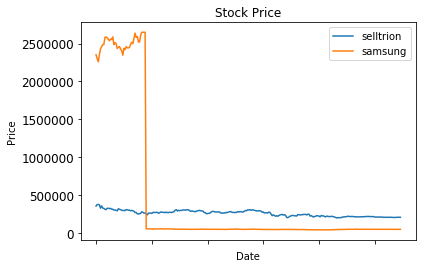

In [470]:
plot_data(df)

/Users/rira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


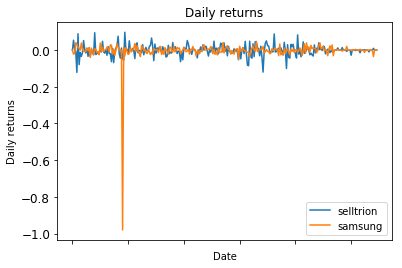

In [452]:
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title = "Daily returns" , ylabel="Daily returns")

In [486]:
# 회사 하나 분석.
# selltrion
def test_run():
    # Read data
    dates = pd.date_range('28-02-18', '28-02-19')  # one month only
    symbols = [selltrion.companyname]
    df = MakeData(symbols, dates)
    plot_data(df, title = "selltrion price")

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title = "Daily returns" , ylabel="Daily returns")
    
    
    #histo
    daily_returns.hist(bins = 20)  # changing number of values to 20.
    #plt.show()
    
    # get mean /std
    mean = daily_returns['selltrion'].mean()
    print("mean :", mean)
    std = daily_returns['selltrion'].std()
    print("std :", std)
    
    # to show on the graph
    plt.axvline(mean, color = "w", linestyle ='dashed', linewidth =2)
    plt.axvline(std, color = "red", linestyle = 'dashed', linewidth = 2)
    plt.axvline(-std, color = "red", linestyle = 'dashed', linewidth = 2)
    plt.show()
    
    
    # compute kurtosis
    print ("kurtosis :" , daily_returns.kurtosis())

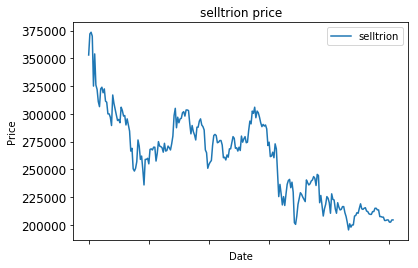

/Users/rira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


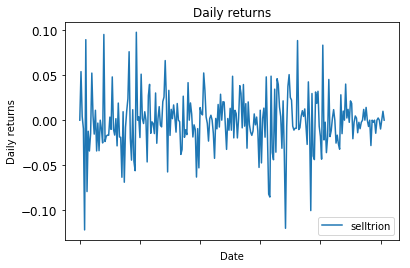

mean : -0.0016536884353200293
std : 0.03135424997975992


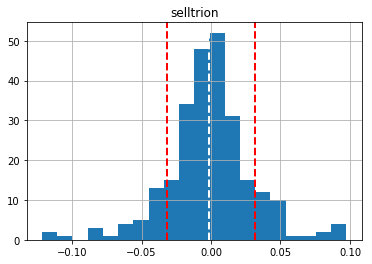

kurtosis : selltrion    2.401691
dtype: float64


In [487]:
test_run()

In [488]:
def test_run():
    # Read data
    dates = pd.date_range('28-02-18', '28-02-19') # 일년간 데이터.
    symbols = [selltrion.companyname, skhynix.companyname ] # 회사이름.
    df = MakeData(symbols, dates)
    plot_data(df)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title = "Daily returns" , ylabel="Daily returns")
    
    #hist
    # daily_returns.hist(bins = 20)
    daily_returns['selltrion'].hist(bins = 20,label = 'selltrion', edgecolor = "black")
    daily_returns['skhynix'].hist(bins = 20,label = 'skhynix',edgecolor = "black")
    plt.legend(loc = 'upper right')
    plt.show()

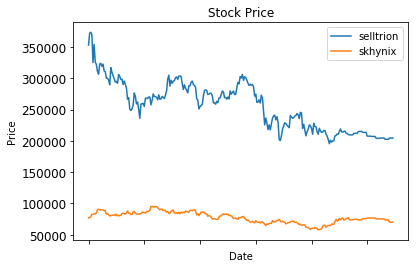

/Users/rira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


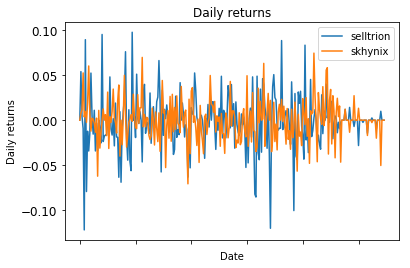

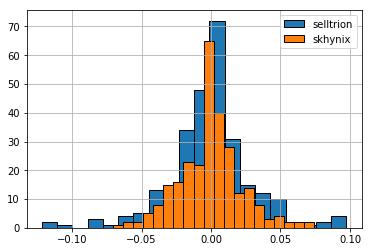

In [489]:
test_run()

In [492]:
# scatterplot
def test_run():
    # Read data
    dates = pd.date_range('28-02-18', '28-02-19') # 일년간 데이터.
    symbols = [selltrion.companyname, skhynix.companyname, samsung.companyname ] # 회사이름.
    df = MakeData(symbols, dates)
    plot_data(df)
    plt.show()

    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title = "Daily returns" , ylabel="rates")
    plt.show()
    
    # scatterplot skhynix vs. samsung
    daily_returns.plot(kind = "scatter",title = "selltrion VS. skhynix",  x='selltrion', y = 'skhynix',edgecolor = "black")
    plt.show()
    daily_returns.plot(kind = "scatter", title = "selltrion VS. samsung", x="selltrion", y = "samsung", edgecolor = "black")
    plt.show()


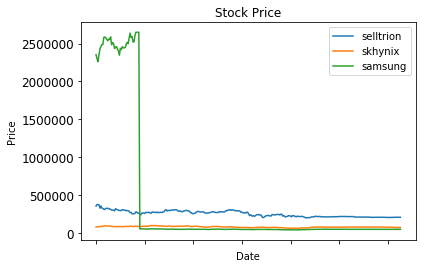

/Users/rira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


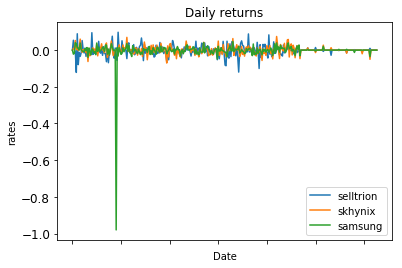

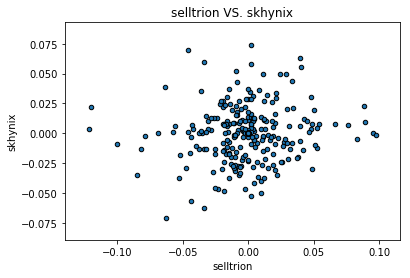

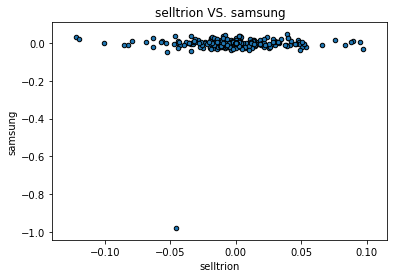

In [493]:
test_run()

In [496]:
def test_run():
    # Read data
    dates = pd.date_range('28-02-18', '28-02-19') # 일년간 데이터.
    symbols = [selltrion.companyname, skhynix.companyname, samsung.companyname ] # 회사이름.
    df = MakeData(symbols, dates)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    
    # scatterplot selltrion vs. skhynix
    daily_returns.plot(kind = "scatter", x='selltrion', y = 'skhynix', edgecolor = "black")
    beta_XOM, alpha_XOM = np.polyfit(daily_returns['selltrion'],daily_returns['skhynix'], 1)
    print("beta_XOM", beta_XOM)
    print("alpha_XOM", alpha_XOM)
    plt.plot(daily_returns['selltrion'], beta_XOM*daily_returns['selltrion'], alpha_XOM, '-', color = "r") # mX + b =
    plt.show()
    
    # scatterplot selltrion vs. samsung
    daily_returns.plot(kind = "scatter", x='selltrion', y = 'samsung',edgecolor = "black")
    #beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'],daily_returns['GLD'], 1)
    #print("beta_GLD", beta_GLD)
    #print("alpha_GLD", alpha_GLD)
    #plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY'], alpha_GLD, '-', color = "r") # mX + b =
    plt.show()
    
    
    # correlations
    print(daily_returns.corr(method = 'pearson')) 
    # pearson is more commonly used method when you calculate correlation.

beta_XOM 0.08236074709954336
alpha_XOM 3.578938466609104e-05


/Users/rira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


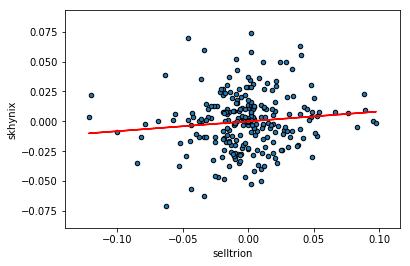

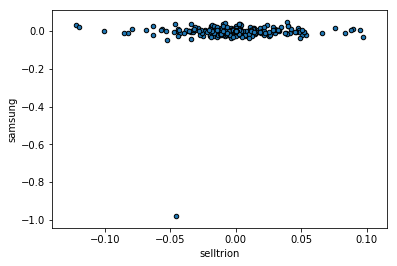

           selltrion   skhynix   samsung
selltrion   1.000000  0.110241  0.071227
skhynix     0.110241  1.000000  0.175043
samsung     0.071227  0.175043  1.000000


In [497]:
test_run()

# 위에 의미있는 분석 하기 위해서 회사 생각하기.
# 각 데이터 분석 의미 찾기

# Using a Keras Long Short-Term Memory (LSTM) Model to Predict Stock Prices